# Q.1)

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip \*.zip  && rm *.zip

--2020-10-03 12:21:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  --.-KB/s    in 0.1s    

2020-10-03 12:21:40 (2.28 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.shape

(17379, 17)

In [5]:
X = data.drop(['instant', 'dteday', 'cnt'], axis=1)
y = data['cnt']
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [6]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adamax, Adagrad
import tensorflow as tf
print(tf.__version__)

2.3.0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Ans 1.1 & 1.2)

1.   Using batch normalization makes the network more stable during training.
2.   Batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.
3. kernel_regularizer: is used as regularization method to avoid problem of overfit
4. activation function used is RELU
5. Metrics used for measure is MAE, Mean Absolute Error


In [8]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(optimizer = "adam", 
              loss = 'mse', 
              metrics = ['mae'])

print_weights = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 14)                56        
_________________________________________________________________
dense (Dense)                (None, 50)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

Ans 1.4)

In [9]:
history = model.fit(
    x_train, 
    y_train, 
    epochs = 20, 
    validation_data = (x_val, y_val), callbacks = [print_weights]
)

score = model.evaluate(x_val, y_val, verbose=1)

print("Test RMSE:", np.sqrt(score[1]))
print("Test MAE:", score[0])

Epoch 1/20
399/435 [==========================>...] - ETA: 0s - loss: 40782.6055 - mae: 138.8925[array([0.77585065, 0.76532066, 0.7890071 , 0.8291425 , 0.8924029 ,
       0.7824556 , 0.7941763 , 0.6756941 , 0.81246245, 0.84328854,
       0.82150525, 0.6733346 , 1.0051229 , 1.2740998 ], dtype=float32), array([-0.01084745,  0.05404349,  0.16128397,  0.11398114, -0.33393916,
        0.10892656,  0.21044986,  0.02594444, -0.02950819,  0.3357813 ,
       -0.09602407, -0.07262957,  0.14871311, -0.05470992], dtype=float32), array([2.4679215e+00, 4.9512106e-01, 6.4449668e+00, 1.1428212e+01,
       2.6734473e-02, 2.9840448e+00, 6.7638701e-01, 1.4144034e+00,
       4.9205905e-01, 4.7082460e-01, 6.2247187e-01, 1.8833613e-01,
       3.5036808e+01, 1.5273335e+02], dtype=float32), array([1.1786734e+00, 2.5052232e-01, 1.1240705e+01, 4.6198086e+01,
       3.7731759e-02, 3.8427582e+00, 2.1931756e-01, 4.1903573e-01,
       4.8331447e-02, 4.1104008e-02, 4.9544070e-02, 2.7137373e-02,
       2.3334092e+03,

In [10]:
from sklearn.metrics import r2_score
r2_score(y_val, model.predict(x_val))

0.9922858038444544

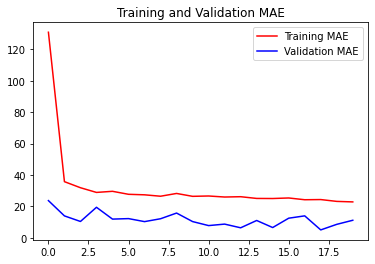

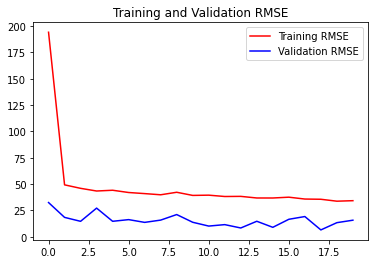

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
mae = history.history['mae']
val_mae = history.history['val_mae']
rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])

epochs = range(len(mae))

plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, rmse, 'r', label='Training RMSE')
plt.plot(epochs, val_rmse, 'b', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.figure()

plt.show()

Ans 1.3)

In [12]:
print(model.layers[3].weights)

[<tf.Variable 'batch_normalization_1/gamma:0' shape=(30,) dtype=float32, numpy=
array([1.6377457 , 1.589093  , 1.5626575 , 1.4333748 , 1.5107926 ,
       1.6095728 , 1.640018  , 1.8942022 , 1.5828235 , 1.7368921 ,
       1.5192193 , 0.87658626, 1.6124437 , 1.5446169 , 1.5515658 ,
       1.6257645 , 1.8080357 , 1.5393436 , 1.4815813 , 1.7147834 ,
       1.5584931 , 1.4756083 , 1.9430637 , 1.5575192 , 1.632083  ,
       1.6139282 , 1.6230828 , 1.4767426 , 1.5516452 , 1.8252529 ],
      dtype=float32)>, <tf.Variable 'batch_normalization_1/beta:0' shape=(30,) dtype=float32, numpy=
array([ 0.6788026 , -0.640756  , -0.69190294, -0.5139872 , -0.6307211 ,
        0.6529042 ,  0.63757753,  0.6503051 , -0.64826584,  0.62252903,
       -0.6580599 ,  0.74589133,  0.6442243 , -0.67856723,  0.65971684,
        0.6127273 , -0.59402716, -0.6105868 , -0.6971661 ,  0.7562114 ,
       -0.6265919 , -0.682988  , -0.6428301 , -0.65533864,  0.62393427,
        0.61370766,  0.62859225, -0.60041547, -0.6265802

# Q.2)

In [13]:
def findNext(grid, i, j):
  #Finding next cell whose value is 0 to fill values
  for x in range(i,9):
    for y in range(j,9):
      if grid[x][y] == 0:
        return x,y
  for x in range(0,9):
    for y in range(0,9):
      if grid[x][y] == 0:
        return x,y
  return -1,-1


def checkRowCloumn(grid, i, j, n):
  #check that the same number is not in row or column or same box 
  rowCheck = all([n != grid[i][x] for x in range(9)])
  if rowCheck:
    columnCheck = all([n != grid[x][j] for x in range(9)])
    if columnCheck:
      topX, topY = 3 *(i//3), 3 *(j//3) #floored quotient should be used here. 
      for x in range(topX, topX+3):
        for y in range(topY, topY+3):
          if grid[x][y] == n:
            return False
      return True
  return False


def solveProblem(grid, i=0, j=0):
  i,j = findNext(grid, i, j)
  if i == -1:
    return True
  for n in range(1,10):
    if checkRowCloumn(grid,i,j,n):
      grid[i][j] = n
      if solveProblem(grid, i, j):
        return True
        # Undo the current cell for backtracking
      grid[i][j] = 0
  return False


def printGrid():
    for i in range(len(grid_input)):
        line = ""
        if i == 3 or i == 6:
            print("---------------------")
        for j in range(len(grid_input[i])):
            if j == 3 or j == 6:
                line += "| "
            line += str(grid_input[i][j])+" "
        print(line)

In [14]:
grid_input = [[5, 3, 0, 0, 7, 0, 0, 0, 0], 
         [6, 0, 0, 1, 9, 5, 0, 0, 0], 
         [0, 9, 8, 0, 0, 0, 0, 6, 0], 
         [8, 0, 0, 0, 6, 0, 0, 0, 3], 
         [4, 0, 0, 8, 0, 3, 0, 0, 1], 
         [7, 0, 0, 0, 2, 0, 0, 0, 6], 
         [0, 6, 0, 0, 0, 0, 2, 8, 0], 
         [0, 0, 0, 4, 1, 9, 0, 0, 5], 
         [0, 0, 0, 0, 8, 0, 0, 7, 9]]
solveProblem(grid_input)
printGrid()

5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
---------------------
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
---------------------
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 
